In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('finaldf.csv')

In [3]:
df.head()

,Index No,Organization,Gender,Nationality,Hire Date,DS Location,DS Country,Family/Non-Family,Position_Count,Years of Service,...,Separation,Suspension,Temp Assignment,Termination,Transfer,Travel for Appointment,Travel for Re-Appointment,Unknown,Update(Local Staff),Performance_mean
0,AAAAAZ,UNICEF,Male,Equatorial Guinea,2015-04-15,Bata,Equatorial Guinea,F,2,5,...,1,0,0,0,0,0,0,0,0,3.0
1,AAADK,UNICEF,Female,Cote d'Ivoire,2009-08-24,Man,Cote D'Ivoire,N,4,11,...,0,0,0,0,0,0,0,2,0,3.0
2,AAAKFZ,UNICEF,Female,Paraguay,2015-04-15,Asuncion,Paraguay,F,2,5,...,0,0,0,0,0,0,0,0,0,3.0
3,AAAKKD,UNDP,Male,Kenya,2008-03-13,Nairobi,Kenya,F,2,11,...,1,0,0,0,1,0,0,0,0,4.0
4,AAAKXX,UNICEF,Male,United Kingdom,2010-09-06,Beirut,Lebanon,F,1,10,...,0,0,0,0,0,0,0,0,0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15090 entries, 0 to 15089
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Index No                        15090 non-null  object 
 1   Organization                    15090 non-null  object 
 2   Gender                          15090 non-null  object 
 3   Nationality                     15090 non-null  object 
 4   Hire Date                       15090 non-null  object 
 5   DS Location                     15090 non-null  object 
 6   DS Country                      15090 non-null  object 
 7   Family/Non-Family               15090 non-null  object 
 8   Position_Count                  15090 non-null  int64  
 9   Years of Service                15090 non-null  int64  
 10  Age                             15090 non-null  float64
 11  Hardship_min                    15090 non-null  float64
 12  Hardship_median                 

# Dummy variables 

In [5]:
# Drop unneccesary columns
mydf = df.drop(['Index No','Hire Date','DS Location','DS Country'], axis=1)

In [6]:
categories = mydf[['Organization', 'Gender', 'Nationality', 'Family/Non-Family']]

In [7]:
cat_dummy = pd.get_dummies(categories, drop_first = True)

In [8]:
mydf2 = mydf.drop(['Organization', 'Gender', 'Nationality', 'Family/Non-Family'], axis=1)
mydf3 = pd.concat([mydf2, cat_dummy], axis = 1)
mydf3.head()

,Position_Count,Years of Service,Age,Hardship_min,Hardship_median,Hardship_max,Min_Incumbent,Max_Incumbent,Add Contingent Worker,Additional Job,...,Nationality_Vanuatu,Nationality_Venezuela,Nationality_Viet Nam,Nationality_Vietnam,Nationality_Yemen,Nationality_Yemen Rep of,Nationality_Yugoslavia,Nationality_Zambia,Nationality_Zimbabwe,Family/Non-Family_N
0,2,5,34.5,4.0,4.0,4.0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,11,44.5,2.0,3.0,5.0,9,14,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,5,34.5,1.0,1.0,1.0,5,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,11,44.5,2.0,2.0,3.0,4,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10,44.5,2.0,2.0,2.0,15,15,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
var = mydf3[['Performance_mean',"Gender_Male", "Position_Count", "Years of Service", "Age", "Hardship_max", "Max_Incumbent", "Family/Non-Family_N"]]

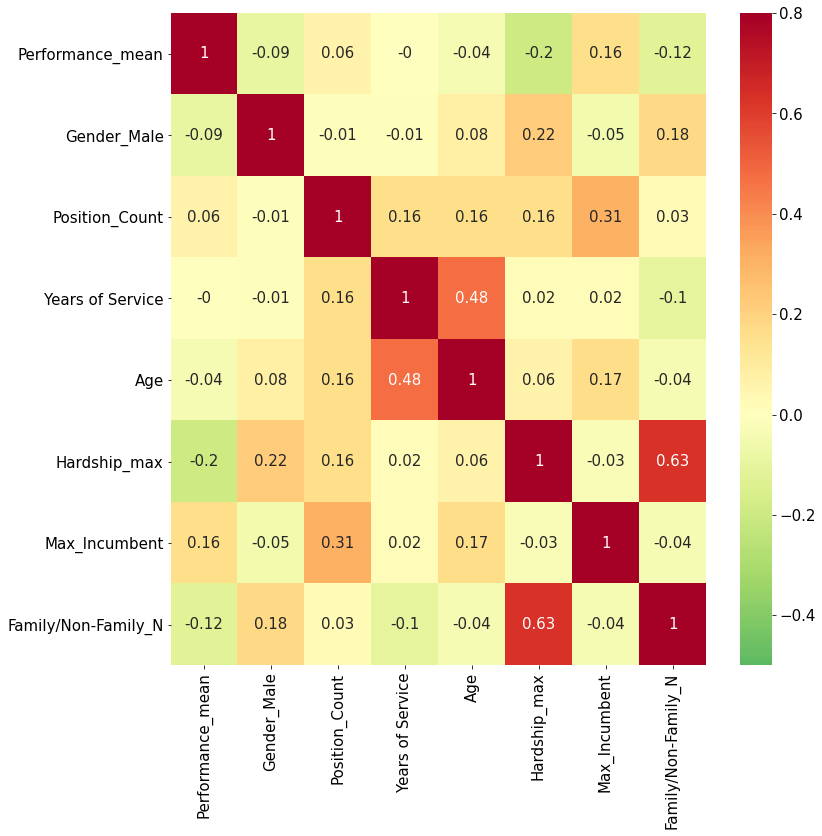

In [10]:
cor_mat = var.corr().round(2)
plt.rcParams['font.size'] = 15
plt.figure(figsize = (12, 12))
sns.heatmap(cor_mat, vmin = -0.5, vmax = 0.8, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);


# Train/Test Split

In [11]:
# Independent variables
X = mydf3.drop('Performance_mean', axis = 1)

# Dependent variables
y = mydf3['Performance_mean']

In [12]:
y.unique()

array([3., 4., 2., 5., 1., 0.])

In [13]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([3, 3, 3, ..., 5, 3, 4])

In [14]:
from sklearn.model_selection import train_test_split
# Call train_test_split on X, y, test_size = 0.25, and random_state = 246
# Make new variables called X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)

# Target variable(performance rating) is imbalanced

Class=3, n=6405 (56.596%)
Class=4, n=3989 (35.248%)
Class=5, n=803 (7.096%)
Class=2, n=67 (0.592%)
Class=1, n=47 (0.415%)
Class=0, n=6 (0.053%)


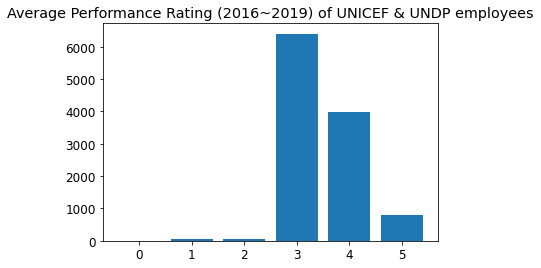

In [15]:
from collections import Counter


# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.rcParams['font.size'] = 12
plt.bar(counter.keys(), counter.values())
plt.title('Average Performance Rating (2016~2019) of UNICEF & UNDP employees')
plt.show()

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11317, 277)
(11317,)
(3773, 277)
(3773,)


# SMOTE for imbalanced dataset
- SMOTE should be applied only to the training dataset
- A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary. One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.
- By default, SMOTE will oversample all classes to have the same number of examples as the class with the most examples.
- Reference: 
https://machinelearningmastery.com/multi-class-imbalanced-classification/
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7

Class=3, n=6405 (16.667%)
Class=4, n=6405 (16.667%)
Class=5, n=6405 (16.667%)
Class=2, n=6405 (16.667%)
Class=1, n=6405 (16.667%)
Class=0, n=6405 (16.667%)


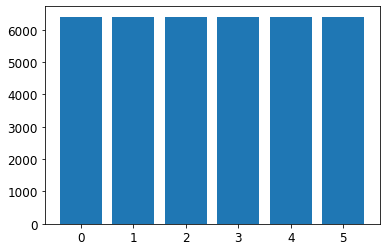

In [17]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

# summarize distribution
counter = Counter(y_train_sm)
for k,v in counter.items():
    per = v / len(y_train_sm) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.rcParams['font.size'] = 12
plt.bar(counter.keys(), counter.values())
plt.show()

# number of rows 15000 --> 30000

In [18]:
print(X_train_sm.shape)
print(y_train_sm.shape)
print(X_test.shape)
print(y_test.shape)

(38430, 277)
(38430,)
(3773, 277)
(3773,)


# Scale

Using Sklearn, standarize the magnitude of the features by scaling the values.

fit() scaler on X_train and then use that fitted scaler to transform() X_test, in order to avoid data leakage while standardizing my data.

In [19]:
#No need to scale the Y of train data 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_sm)
X_tr_scaled = scaler.transform(X_train_sm)
X_te_scaled = scaler.transform(X_test)

In [20]:
pd.DataFrame(X_tr_scaled, index = X_train_sm.index, columns = X_train_sm.columns).head()

,Position_Count,Years of Service,Age,Hardship_min,Hardship_median,Hardship_max,Min_Incumbent,Max_Incumbent,Add Contingent Worker,Additional Job,...,Nationality_Vanuatu,Nationality_Venezuela,Nationality_Viet Nam,Nationality_Vietnam,Nationality_Yemen,Nationality_Yemen Rep of,Nationality_Yugoslavia,Nationality_Zambia,Nationality_Zimbabwe,Family/Non-Family_N
0,0.0,0.275,0.50,0.6,0.6,0.8,0.352941,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.200,0.50,0.2,0.2,0.2,0.294118,0.277778,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.550,0.50,1.0,1.0,1.0,0.823529,0.777778,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.225,0.50,0.2,0.2,0.4,0.529412,0.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.075,0.25,0.6,0.8,0.8,0.294118,0.277778,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train/Test with RandomForestClassifier

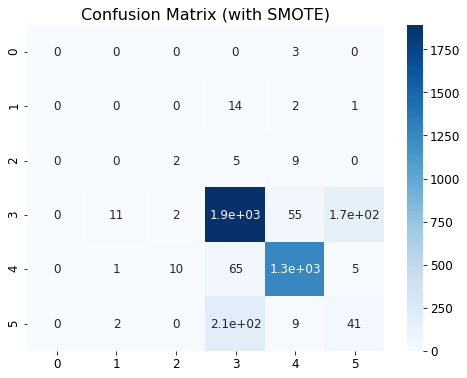

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_tr_scaled, y_train_sm)
y_pred = rfc.predict(X_te_scaled)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [22]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score

In [23]:
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print('Random Forest: recall-score=%.3f' % (recall))

Random Forest: Accuracy=0.848
Random Forest: f1-score=0.842
Random Forest: recall-score=0.848


30


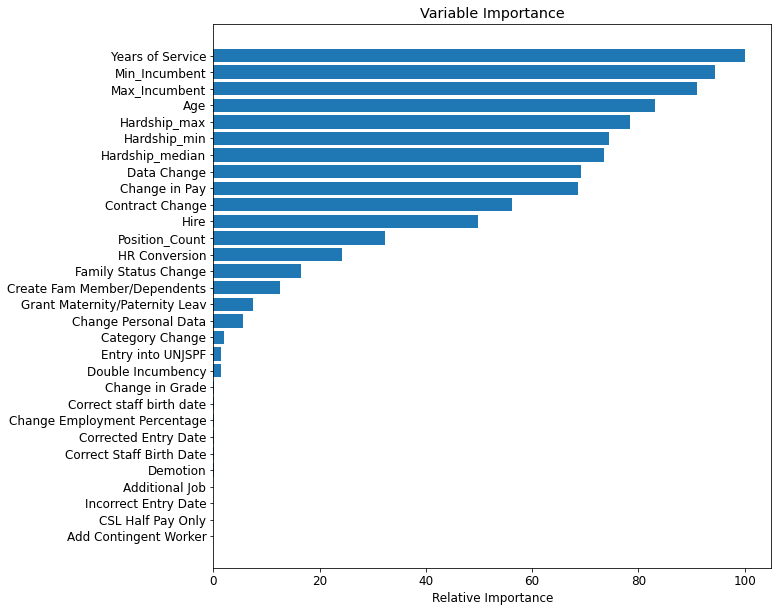

In [24]:
feature_importance = rfc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Tuning parameters

### 1. First Parameter tuning with RandomizedSearchCV() for Random Forest model
don't do gridsearch: irrelevant parameter 가 있는데, grid search 를 하면 duplicate하고 낭비한다. 
just pick randomly!


The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [25]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

- n_estimators = number of trees in the foreset
- max_features = The number of features to consider when looking for the best split
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [26]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 50, 100],
               'max_features': ['sqrt'],
               'min_samples_leaf': [1, 2, 10],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]}

In [27]:
# Use the random grid to search for best hyperparameters
# n_iter: Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.
# rfc = RandomForestClassifier(random_state=42)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(X_tr_scaled, y_train_sm) # took 20 mins

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 100],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [28]:
rfc_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_split=5, n_estimators=400, random_state=42)

In [29]:
rfc_random.best_score_

0.9515222482435597

In [27]:
# Fit and predict with the first tuned model 
RFC1 = RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_split=5, n_estimators=400, random_state=42)
RFC1.fit(X_tr_scaled, y_train_sm)
y_pred_rfc1 = RFC1.predict(X_te_scaled)

In [28]:
# Calculate scores
acc = accuracy_score(y_test, y_pred_rfc1)
f1 = f1_score(y_test, y_pred_rfc1, average='weighted')
recall = recall_score(y_test, y_pred_rfc1, average='weighted')

print('Random Forest: Accuracy=%.3f' % (acc))
print('Random Forest: f1-score=%.3f' % (f1))
print('Random Forest: recall-score=%.3f' % (recall))

Random Forest: Accuracy=0.860
Random Forest: f1-score=0.847
Random Forest: recall-score=0.860


# Save result to csv

In [29]:
prediction = y_pred_rfc1

original_performance_score = y_test

IndexNo = df['Index No']

In [30]:
rfc1_result = pd.DataFrame(list(zip(IndexNo, original_performance_score, prediction)), columns =['IndexNo', 'original_performance_score', 'prediction'])
rfc1_result.head()

,IndexNo,original_performance_score,prediction
0,AAAAAZ,3,3
1,AAADK,3,3
2,AAAKFZ,4,4
3,AAAKKD,3,1
4,AAAKXX,3,5


In [34]:
#rfc1_result.to_csv('final_result_rfc1.csv', header=True, index=False)

### Second parameter tuning for Random Forest model

In [35]:
random_grid2 = {'bootstrap': [True, False],
               'max_depth': [50, 100, 200, 500],
               'max_features': ['sqrt'],
               'min_samples_leaf': [1, 2, 10],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]}

rfc_random2 = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid2, n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rfc_random2.fit(X_tr_scaled, y_train_sm) # about an hour

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 100, 200, 500],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

# Q) This does not give me full description of parameters

In [36]:
rfc_random2.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       n_estimators=800, random_state=42)

In [37]:
rfc_random2.best_score_ # increased

0.9563101743429613

In [34]:
# Fit and predict with the second tuned model 

RFC2 = RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt', 
                              min_samples_split=5, n_estimators=800, random_state=42) 
RFC2.fit(X_tr_scaled, y_train_sm)

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='sqrt',
                       min_samples_split=5, n_estimators=800, random_state=42)

In [36]:
y_pred_rfc2 = RFC2.predict(X_te_scaled)

In [37]:
# Calculate scores
acc_2 = accuracy_score(y_test, y_pred_rfc2)
f1_2 = f1_score(y_test, y_pred_rfc2, average='weighted')
recall_2 = recall_score(y_test, y_pred_rfc2, average='weighted')

print('Random Forest: Accuracy=%.3f' % (acc_2))
print('Random Forest: f1-score=%.3f' % (f1_2))
print('Random Forest: recall-score=%.3f' % (recall_2))

Random Forest: Accuracy=0.862
Random Forest: f1-score=0.848
Random Forest: recall-score=0.862


# Q) The best_score_ with training data is different from the score with test data. 
# What is happening here?

# Confusion Matrix with tuned Random Forest model

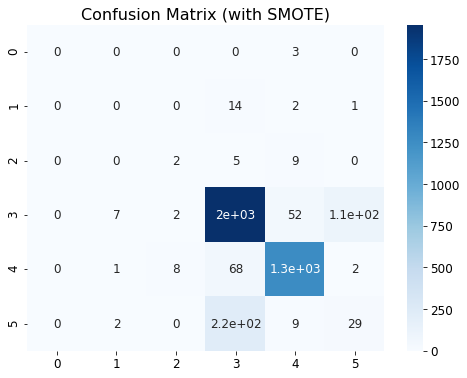

In [38]:
cm2 = confusion_matrix(y_test, y_pred_rfc2)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm2, annot=True, cmap='Blues');

# Without using SMOTE with the first tuned Random Forest

# Q) Better than with SMOTE model!!?

In [40]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [41]:
RFC2.fit(X_tr_scaled, y_train)
y_pred_rfc2_without_smote = RFC2.predict(X_te_scaled)

In [42]:
# Calculate scores
acc = accuracy_score(y_test, y_pred_rfc2_without_smote)
f1 = f1_score(y_test, y_pred_rfc2_without_smote, average='weighted')
recall = recall_score(y_test, y_pred_rfc2_without_smote, average='weighted')

print('Random Forest: Accuracy=%.3f' % (acc))
print('Random Forest: f1-score=%.3f' % (f1))
print('Random Forest: recall-score=%.3f' % (recall))

Random Forest: Accuracy=0.889
Random Forest: f1-score=0.857
Random Forest: recall-score=0.889


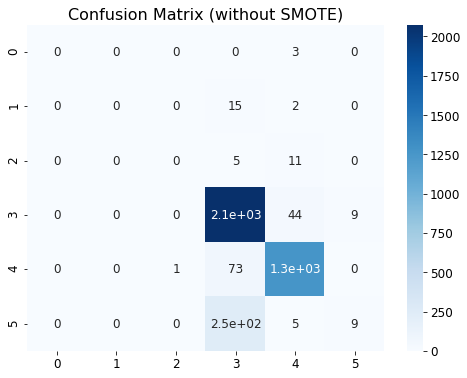

In [43]:
cm3 = confusion_matrix(y_test, y_pred_rfc2_without_smote)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm3, annot=True, cmap='Blues');

# Try more models <이걸 앞으로 빼기>

In [28]:
#!pip install xgboost

In [29]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.model_selection import StratifiedKFold

In [48]:
kfold = StratifiedKFold(n_splits = 5)
# Modeling step Test differents algorithms 
random_state = 42
classifiers = []

#classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(XGBClassifier(learning_rate=0.1,random_state=random_state))
#classifiers.append(KNeighborsClassifier())


In [49]:
classifiers

[AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                    learning_rate=0.1, random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42),
 XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=0.1, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=42, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None)]

In [50]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_tr_scaled, y = y_train_sm, scoring = "accuracy", cv = kfold, n_jobs=4))


In [51]:
cv_results

[array([0.8793911 , 0.92206609, 0.92362737, 0.92974239, 0.92766068]),
 array([0.90710383, 0.96096799, 0.96291959, 0.96213895, 0.96148842]),
 array([0.81811085, 0.86651054, 0.86794171, 0.85974499, 0.85571168]),
 array([0.856102  , 0.92674993, 0.92740047, 0.9163414 , 0.91347905])]

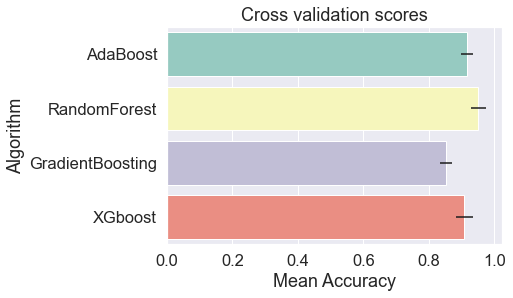

In [52]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["AdaBoost","RandomForest","GradientBoosting", "XGboost"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [53]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.916498,0.018755,AdaBoost
1,0.950924,0.021920,RandomForest
2,0.853604,0.018298,GradientBoosting
3,0.908015,0.026537,XGboost


# Proportional Odds Logistic Regression for Ordered Category Outcomes
Handbook of Regression Modeling in People Analytics: 
https://peopleanalytics-regression-book.org/ord-reg.html


In [23]:
    
#pd.set_option('display.max_rows', 100)